#Paper implementation and improvement "Comparative Analysis of KNN Algorithm using Various Normalization Techniques", I. J. Computer Network and Information Security, 2017, 11, 36-42, Published Online November 2017 in MECS (http://www.mecs-press.org/), DOI: 10.5815/ijcnis.2017.11.04


#Author: Gowthami K
#Version: V6.5.4 November 2023

In [2]:
#Import required libraries
import pandas as pd
import numpy as np

In [3]:
#Read the data
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [4]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [5]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


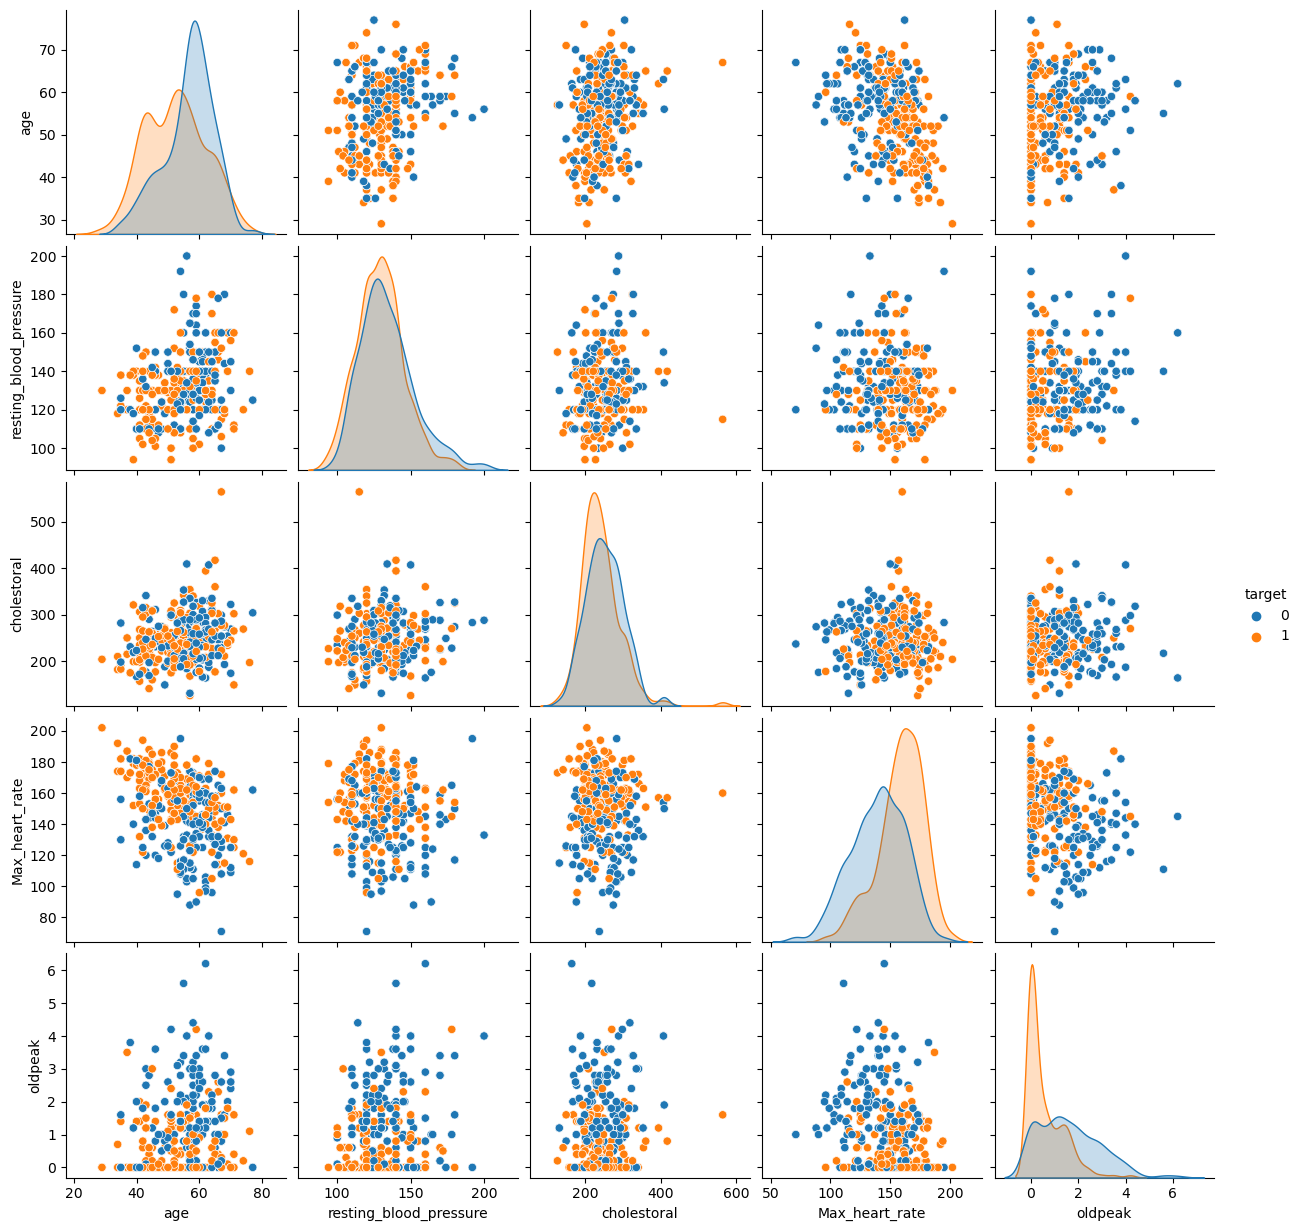

In [8]:
#First improvement - data exploration
sns.pairplot(df, hue = 'target')

In [9]:
#Get data for normalization
factors = ['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak']
X = df[factors]
y = df['target']

In [10]:
X.head()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [11]:
y.sample(5)

318    0
986    0
391    0
993    0
487    0
Name: target, dtype: int64

In [12]:
#Implement min-max scaler
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_min_max = min_max.fit(X).transform(X)

In [13]:
X_min_max

array([[0.47916667, 0.29245283, 0.19634703, 0.74045802, 0.16129032],
       [0.5       , 0.43396226, 0.17579909, 0.64122137, 0.5       ],
       [0.85416667, 0.48113208, 0.10958904, 0.41221374, 0.41935484],
       ...,
       [0.375     , 0.1509434 , 0.34018265, 0.35877863, 0.16129032],
       [0.4375    , 0.1509434 , 0.29223744, 0.67175573, 0.        ],
       [0.52083333, 0.24528302, 0.14155251, 0.32061069, 0.22580645]])

In [14]:
#Standard scaler
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
X_std_scl = std_scl.fit(X).transform(X)

In [15]:
X_std_scl

array([[-0.26843658, -0.37763552, -0.65933209,  0.82132052, -0.06088839],
       [-0.15815703,  0.4791073 , -0.83386117,  0.2559679 ,  1.72713707],
       [ 1.71659547,  0.76468824, -1.39623266, -1.04869198,  1.30141672],
       ...,
       [-0.81983438, -1.23437834,  0.56237149, -1.35311262, -0.06088839],
       [-0.4889957 , -1.23437834,  0.15513696,  0.42992256, -0.91232909],
       [-0.04787747, -0.66321646, -1.12474297, -1.57055593,  0.27968789]])

In [16]:
#Second improvement - ABsolute maximum scaler
from sklearn.preprocessing import MaxAbsScaler
max_scl = StandardScaler()
X_max_scl = max_scl.fit(X).transform(X)

In [17]:
X_max_scl

array([[-0.26843658, -0.37763552, -0.65933209,  0.82132052, -0.06088839],
       [-0.15815703,  0.4791073 , -0.83386117,  0.2559679 ,  1.72713707],
       [ 1.71659547,  0.76468824, -1.39623266, -1.04869198,  1.30141672],
       ...,
       [-0.81983438, -1.23437834,  0.56237149, -1.35311262, -0.06088839],
       [-0.4889957 , -1.23437834,  0.15513696,  0.42992256, -0.91232909],
       [-0.04787747, -0.66321646, -1.12474297, -1.57055593,  0.27968789]])

In [18]:
#Robust scaler
from sklearn.preprocessing import RobustScaler
rob_scl = RobustScaler()
X_rob_scl = rob_scl.fit(X).transform(X)

In [19]:
X_rob_scl

array([[-0.30769231, -0.25      , -0.4375    ,  0.47058824,  0.11111111],
       [-0.23076923,  0.5       , -0.578125  ,  0.08823529,  1.27777778],
       [ 1.07692308,  0.75      , -1.03125   , -0.79411765,  1.        ],
       ...,
       [-0.69230769, -1.        ,  0.546875  , -1.        ,  0.11111111],
       [-0.46153846, -1.        ,  0.21875   ,  0.20588235, -0.44444444],
       [-0.15384615, -0.5       , -0.8125    , -1.14705882,  0.33333333]])

In [23]:
# Split the data into training and test sets
#Min max scaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score, recall_score,roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2)

#Fit and evaluate a knn model
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

#Predict on test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate the F1 Score
f1 = f1_score(y_test, y_pred)
#Calculate the Precision
precision = precision_score(y_test, y_pred)
#Calculate the recall
recall = recall_score(y_test, y_pred)
# Calculate AUC-ROC
y_scores = knn.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_scores)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7024390243902439
F1 Score: 0.7404255319148936
Precision: 0.6744186046511628
Recall: 0.8207547169811321
AUC-ROC: 0.8067467124070897


In [27]:
#Standard scaler
X_train, X_test, y_train, y_test = train_test_split(X_std_scl, y, test_size=0.2)

#Fit and evaluate a knn model
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

#Predict on test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate the F1 Score
f1 = f1_score(y_test, y_pred)
#Calculate the Precision
precision = precision_score(y_test, y_pred)
#Calculate the recall
recall = recall_score(y_test, y_pred)
# Calculate AUC-ROC
y_scores = knn.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_scores)

# Print the F1 Score
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)

Accuracy: 0.6682926829268293
F1 Score: 0.6991150442477877
Precision: 0.7117117117117117
Recall: 0.6869565217391305
AUC-ROC: 0.7420772946859904


In [31]:
#Max absolute scaler
X_train, X_test, y_train, y_test = train_test_split(X_max_scl, y, test_size=0.2)

#Fit and evaluate a knn model
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

#Predict on test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate the F1 Score
f1 = f1_score(y_test, y_pred)
#Calculate the Precision
precision = precision_score(y_test, y_pred)
#Calculate the recall
recall = recall_score(y_test, y_pred)
# Calculate AUC-ROC
y_scores = knn.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_scores)


# Print the F1 Score
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7317073170731707
F1 Score: 0.7488584474885844
Precision: 0.7008547008547008
Recall: 0.803921568627451
AUC-ROC: 0.8129640205596802


In [35]:
#Robust scaler
X_train, X_test, y_train, y_test = train_test_split(X_rob_scl, y, test_size=0.2)

#Fit and evaluate a knn model
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

#Predict on test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate the F1 Score
f1 = f1_score(y_test, y_pred)
#Calculate the Precision
precision = precision_score(y_test, y_pred)
#Calculate the recall
recall = recall_score(y_test, y_pred)
# Calculate AUC-ROC
y_scores = knn.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_scores)


# Print the F1 Score
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)

Accuracy: 0.6829268292682927
F1 Score: 0.7031963470319635
Precision: 0.6311475409836066
Recall: 0.7938144329896907
AUC-ROC: 0.7660366552119129


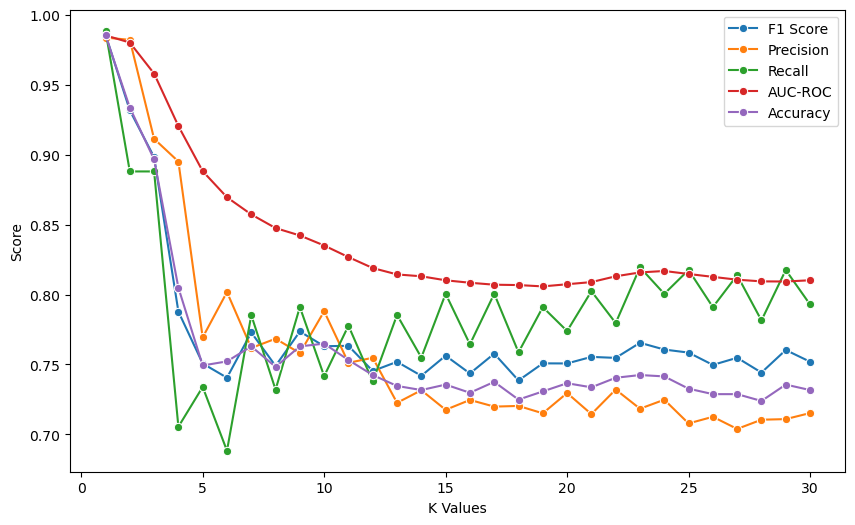

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

#Implement min-max scaler
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_min_max = min_max.fit(X).transform(X)
# Define a list of K values
k_values = list(range(1, 31))

# Create empty lists to store metric scores for each K value
f1_scores = []
precision_scores = []
recall_scores = []
auc_roc_scores = []
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation with 5 folds and calculate multiple metrics
    scores = cross_val_score(knn, X_min_max, y, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))
    
    f1_scores.append(np.mean(cross_val_score(knn, X_min_max, y, cv=5, scoring='f1')))
    precision_scores.append(np.mean(cross_val_score(knn, X_min_max, y, cv=5, scoring='precision')))
    recall_scores.append(np.mean(cross_val_score(knn, X_min_max, y, cv=5, scoring='recall')))
    
    # Calculate AUC-ROC scores
    y_scores = cross_val_predict(knn, X_min_max, y, cv=5, method='predict_proba')[:, 1]
    auc_roc_scores.append(roc_auc_score(y, y_scores))

# Plot the K values against different metric scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=f1_scores, marker='o', label='F1 Score')
sns.lineplot(x=k_values, y=precision_scores, marker='o', label='Precision')
sns.lineplot(x=k_values, y=recall_scores, marker='o', label='Recall')
sns.lineplot(x=k_values, y=auc_roc_scores, marker='o', label='AUC-ROC')
sns.lineplot(x=k_values, y=accuracy_scores, marker='o', label='Accuracy')
plt.xlabel("K Values")
plt.ylabel("Score")
plt.legend()
plt.show()



In [44]:
# Create empty lists to store metric scores for each K value
f1_scores = []
precision_scores = []
recall_scores = []
auc_roc_scores = []
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation with 5 folds and calculate multiple metrics
    scores = cross_val_score(knn,X_std_scl, y, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))
    
    f1_scores.append(np.mean(cross_val_score(knn,X_std_scl, y, cv=5, scoring='f1')))
    precision_scores.append(np.mean(cross_val_score(knn,X_std_scl, y, cv=5, scoring='precision')))
    recall_scores.append(np.mean(cross_val_score(knn, X_std_scl, y, cv=5, scoring='recall')))
    
    # Calculate AUC-ROC scores
    y_scores = cross_val_predict(knn, X_std_scl, y, cv=5, method='predict_proba')[:, 1]
    auc_roc_scores.append(roc_auc_score(y, y_scores))

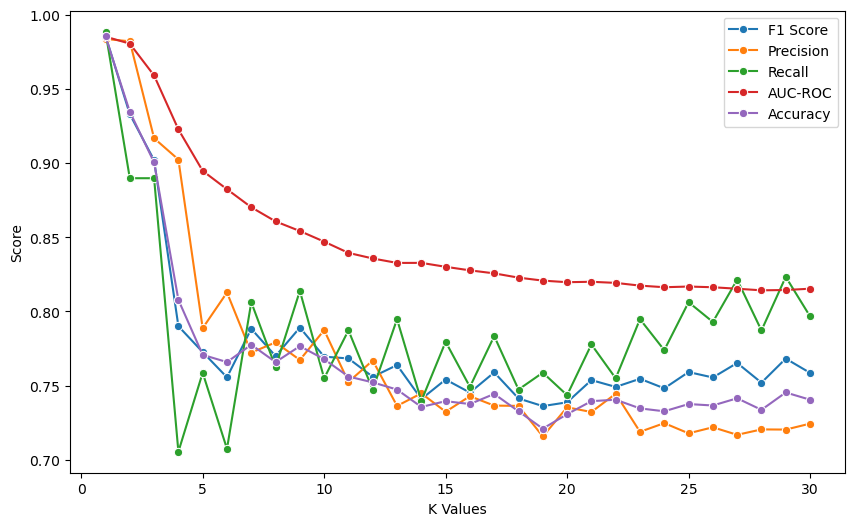

In [45]:
# Plot the K values against different metric scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=f1_scores, marker='o', label='F1 Score')
sns.lineplot(x=k_values, y=precision_scores, marker='o', label='Precision')
sns.lineplot(x=k_values, y=recall_scores, marker='o', label='Recall')
sns.lineplot(x=k_values, y=auc_roc_scores, marker='o', label='AUC-ROC')
sns.lineplot(x=k_values, y=accuracy_scores, marker='o', label='Accuracy')
plt.xlabel("K Values")
plt.ylabel("Score")
plt.legend()
plt.show()

In [46]:
# Create empty lists to store metric scores for each K value
f1_scores = []
precision_scores = []
recall_scores = []
auc_roc_scores = []
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation with 5 folds and calculate multiple metrics
    scores = cross_val_score(knn,X_max_scl, y, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))
    
    f1_scores.append(np.mean(cross_val_score(knn,X_max_scl, y, cv=5, scoring='f1')))
    precision_scores.append(np.mean(cross_val_score(knn,X_max_scl, y, cv=5, scoring='precision')))
    recall_scores.append(np.mean(cross_val_score(knn, X_max_scl, y, cv=5, scoring='recall')))
    
    # Calculate AUC-ROC scores
    y_scores = cross_val_predict(knn, X_max_scl, y, cv=5, method='predict_proba')[:, 1]
    auc_roc_scores.append(roc_auc_score(y, y_scores))

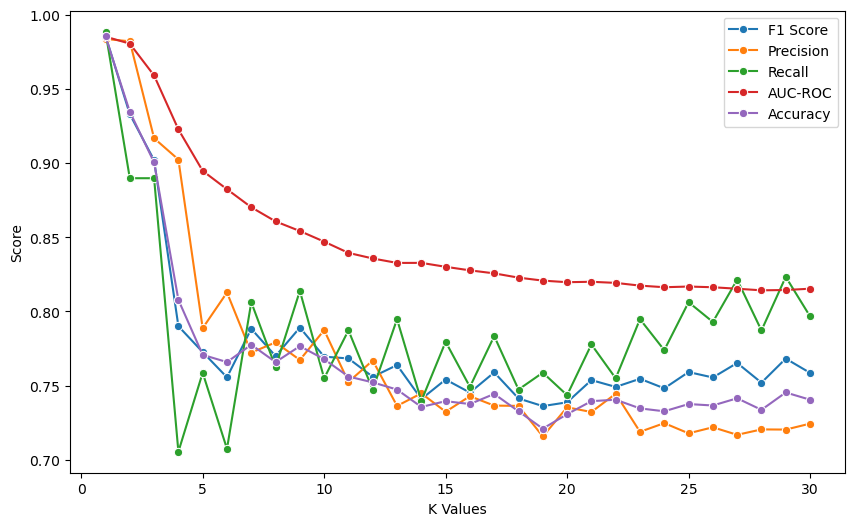

In [47]:
# Plot the K values against different metric scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=f1_scores, marker='o', label='F1 Score')
sns.lineplot(x=k_values, y=precision_scores, marker='o', label='Precision')
sns.lineplot(x=k_values, y=recall_scores, marker='o', label='Recall')
sns.lineplot(x=k_values, y=auc_roc_scores, marker='o', label='AUC-ROC')
sns.lineplot(x=k_values, y=accuracy_scores, marker='o', label='Accuracy')
plt.xlabel("K Values")
plt.ylabel("Score")
plt.legend()
plt.show()

In [48]:
# Create empty lists to store metric scores for each K value
f1_scores = []
precision_scores = []
recall_scores = []
auc_roc_scores = []
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation with 5 folds and calculate multiple metrics
    scores = cross_val_score(knn,X_rob_scl, y, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))
    
    f1_scores.append(np.mean(cross_val_score(knn,X_rob_scl, y, cv=5, scoring='f1')))
    precision_scores.append(np.mean(cross_val_score(knn,X_rob_scl, y, cv=5, scoring='precision')))
    recall_scores.append(np.mean(cross_val_score(knn, X_rob_scl, y, cv=5, scoring='recall')))
    
    # Calculate AUC-ROC scores
    y_scores = cross_val_predict(knn, X_rob_scl, y, cv=5, method='predict_proba')[:, 1]
    auc_roc_scores.append(roc_auc_score(y, y_scores))

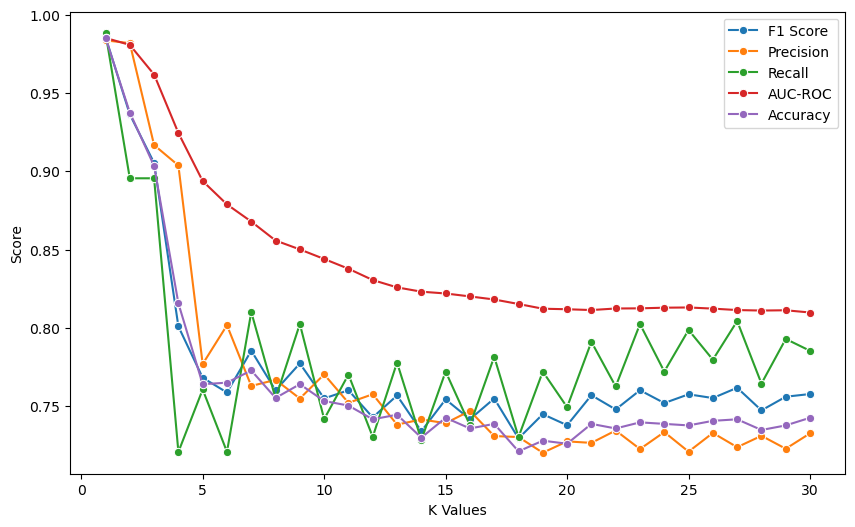

In [49]:
# Plot the K values against different metric scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=f1_scores, marker='o', label='F1 Score')
sns.lineplot(x=k_values, y=precision_scores, marker='o', label='Precision')
sns.lineplot(x=k_values, y=recall_scores, marker='o', label='Recall')
sns.lineplot(x=k_values, y=auc_roc_scores, marker='o', label='AUC-ROC')
sns.lineplot(x=k_values, y=accuracy_scores, marker='o', label='Accuracy')
plt.xlabel("K Values")
plt.ylabel("Score")
plt.legend()
plt.show()